# OOP-2 Encapsulation and Static Keys

### Write OOP classes to handle the following scenarios:

1. A user can create and view 2D coordinates
2. A user can find out the distance between 2 coordinates
3. A user can find find the distance of a coordinate from origin
4. A user can check if a point lies on a given line
5. A user can find the distance between a given 2D point and a given line

In [37]:
class Point:

  def __init__(self, x, y):
    self.x_cod = x
    self.y_cod = y

  # for formatting the string in <x, y>
  # for sol 1.
  def __str__(self):
    return f'<{self.x_cod}, {self.y_cod}>'


  # self of the format (x1, y1), other of the format (x2, y2)
  # for sol 2.
  def euclidean_distance(self, other):
    return ((self.x_cod - other.x_cod)**2 + (self.y_cod - other.y_cod)**2)**0.5

  # distance from origin
  # for sol 3.
  def distFromOrigin(self):
    return self.euclidean_distance(Point(0, 0))

class Line:

  def __init__(self, a, b, c):
    self.A = a
    self.B = b
    self.C = c

  def __str__(self):
    return f'{self.A}x + {self.B}y + {self.C}'

# for checking if a point coincides on a line
# for sol 4.
  def point_on_line(line, point):
    if line.A*point.x_cod + line.B*point.y_cod + line.C == 0:
      return "lies on the line"
    else:
      return "does not lie on the line"
  
  # for finding the shortest distance btwn a line and a point
  # for sol 5.
  def shortest_distance(line, point):
    return abs(line.A*point.x_cod + line.B*point.y_cod + line.C)/(line.A**2 + line.B**2)**0.5

In [21]:
p1 = Point(0, 0)
print(p1)
p2 = Point(10, 10)
p1.euclidean_distance(p2)
p2.distFromOrigin()

<0, 0>


14.142135623730951

In [40]:
l1 = Line(1,1,-2)
p1 = Point(1,10)
print(l1)
print(p1)

l1.point_on_line(p1)
l1.shortest_distance(p1)

1x + 1y + -2
<1, 10>


6.363961030678928

### Explanation of the above code

#### `class Point:`
Class Point represents the characteristics of a point and how to display them, as well as defines the method and attributes on them.

#### `def euclidean_distance(self, other):`
This method takes objects of the point class. The first object is being passed as the parameter `self`, and the second class is being passed as the parameter `other`.

Note that the first method being passed is passed as follows: `p1.euclidean_distance()`, while the second parameter is being sent as arguement.

#### `def distFromOrigin(self):`
Here, the method `euclidean_distance()` is being called and then the origin is being passed as the second arguement as follows, `return self.euclidean_distance(Point(0, 0))`, while the first object is being passed as the `self`.

---

#### `class Line:`
Class Line represents the attributes of a line and how to display them, as well as defines the method and attributes on them.

#### `def __str__(self):`
Displays a line in the form of the equation of a line of `ax + by + c = 0`

#### `def point_on_line(line, point):`
Takes two parameters, `line` and `point`. Here, `line` takes the place of the **self** variable, and the object of **class Point** is passed as `point`

Then, putting the values of point from the **object point**, if the left-hand side equation equates to 0, then the points are supposed to be coinciding on the line.

### How objects access attributes

In [41]:
class Person:

  def __init__(self,name_input,country_input):
    self.name = name_input
    self.country = country_input

  def greet(self):
    if self.country == 'india':
      print('Namaste',self.name)
    else:
      print('Hello',self.name)


In [46]:
# how to access attributes
p = Person('harsh','india')
# how to access methods
p.greet()

Namaste harsh


In [ ]:
# what if i try to access non-existent attributes
p.gender

AttributeError: ignored

In [ ]:
p.gender = 'male'
p.gender
# this is known as attribute creation from outisde of the class
# and is explained below

'male'

## Attribute creation from outside of the class

In Python, you can dynamically add attributes to an object **from outside the class** after the object has been created. This is a feature of Python's dynamic nature and is possible because Python allows you to modify the attributes of an object at runtime.

### How does it work?

1. **Creating an object**: You create an instance of a class as usual.

   ```python
   class Person:
       def __init__(self, name, age):
           self.name = name
           self.age = age

   person = Person("Alice", 30)
   ```

2. **Adding an attribute dynamically**: You can then assign new attributes to the instance from **outside** the class definition, even though they were not part of the class at the time of definition.

   ```python
   person.address = "123 Main St"  # Adding a new attribute
   print(person.address)  # Output: 123 Main St
   ```

3. **Modifying existing attributes**: You can also modify existing attributes directly.

   ```python
   person.age = 31  # Modify existing attribute
   print(person.age)  # Output: 31
   ```

### Key Points:
- **Dynamic nature**: Python objects can have attributes added, modified, or removed at runtime.
- **No restrictions**: There’s no need for getter/setter methods or any other special mechanism to add attributes from outside the class.
- **Namespace**: The added attribute is stored in the instance's `__dict__` (the namespace of the object), not the class definition.

### Example:

```python
class Car:
    def __init__(self, make, model):
        self.make = make
        self.model = model

# Create an instance
my_car = Car("Toyota", "Corolla")

# Add a new attribute outside the class
my_car.year = 2020
print(my_car.year)  # Output: 2020
```

### Considerations:
- **Consistency**: While dynamic attribute addition is flexible, it can make code harder to maintain or understand. It’s generally better to define attributes inside the class unless you have a good reason to do so dynamically.
- **`__slots__`**: If the class defines `__slots__`, dynamic attributes cannot be added unless they are defined in `__slots__`, since `__slots__` restricts the instance to only having specific attributes.

### When to use:
- This dynamic behavior is useful in cases where you don’t know the full set of attributes upfront (e.g., when dealing with data structures or configurations).
- It’s commonly seen in situations where you’re interacting with JSON data or databases where the schema might not be fixed.

In summary, **attributes can be added from outside the class** in Python, making the language flexible and dynamic, but this should be used carefully to maintain code clarity and consistency.

## Reference Variables

- Reference variables hold the objects
- We can create objects without reference variable as well
- An object can have multiple reference variables
- Assigning a new reference variable to an existing object does not create a new object

That is, when we write `p = Person()`, where `Person()` is a class, `p` is not the object that is being created, rather p is the **reference** to the address where the object has been created.

In [50]:
# object without a reference
class Person:

  def __init__(self):
    self.name = 'harsh'
    self.gender = 'male'

p = Person()
q = p
# Multiple ref but point to the same address
print(id(p))
print(id(q))

2855684199088
2855684199088


In [51]:
# changes being made using one reference has been made for the whole object
print(p.name)
print(q.name)
q.name = 'ankit'
print(q.name)
print(p.name)

harsh
harsh
ankit
ankit


## Pass by Reference

In [52]:
class Person:

  def __init__(self,name,gender):
    self.name = name
    self.gender = gender

# outside the class -> function
def greet(person):
  print('Hi my name is',person.name,'and I am a',person.gender)
  p1 = Person('ankit','male')
  return p1

p = Person('kela','male')
x = greet(p)
print(x.name)
print(x.gender)

Hi my name is kela and I am a male
ankit
male


In [55]:
class Person:

  def __init__(self,name,gender):
    self.name = name
    self.gender = gender

# outside the class -> function
def greet(person):
  print(id(person))
  person.name = 'ankit'
  print(person.name)

p = Person('kela','male')
print(id(p))
greet(p)
print(p.name)

2855684198080
2855684198080
ankit
ankit


## Mutability of Objects

In Python, the concept of **mutability** refers to whether or not the state (data) of an object can be changed after it is created. 

- **Mutable objects** are objects whose state or content can be modified after they are created. Examples include lists, dictionaries, sets, and most user-defined objects.
- **Immutable objects** are objects whose state cannot be changed after they are created. Examples include strings, integers, and tuples.

### Example: Mutability in Practice

Consider the following code where a `Person` object is passed to a function and its attributes are modified:

```python
class Person:
    def __init__(self, name, gender):
        self.name = name
        self.gender = gender

# Outside the class -> function
def greet(person):
    person.name = 'ankit'  # Modify the 'name' attribute
    return person

p = Person('kela', 'male')  # Create a Person object
print(id(p))  # Print the id (memory address) of the object
p1 = greet(p)  # Pass the object to the function and modify it
print(id(p1))  # Print the id of the modified object
```

### Explanation:

1. **Mutable Nature of Objects**: 
   - In Python, **objects created from user-defined classes** (like `Person`) are **mutable** by default. This means that when you pass an object to a function, the function can modify its attributes.
   
2. **Passing by Reference**:
   - In the example, when `p` is passed to the `greet` function, it is passed by reference (not by value). This means that the `person` parameter inside the function refers to the same object as `p`.
   - The `greet` function modifies the `name` attribute of the `person` object. Since the object is mutable, this modification is reflected outside the function as well.

3. **IDs of Objects**:
   - `id(p)` prints the memory address of the original object `p`.
   - After modifying the object inside the function, `id(p1)` prints the same memory address, because both `p` and `p1` refer to the **same object** that was modified. 
   
### Output:
```python
140078730306192  # id of the original object p
140078730306192  # id of the modified object p1 (same object)
```

### Conclusion:

- **Mutable Objects**: When you pass a mutable object (like a `Person`) to a function, the function can modify the object's state. This is why both `p` and `p1` in the example refer to the same object and share the same memory address.
- **Passing by Reference**: Objects in Python are passed to functions by reference, so any changes to the object inside the function affect the original object outside the function.


In [56]:
class Person:

  def __init__(self,name,gender):
    self.name = name
    self.gender = gender

# outside the class -> function
def greet(person):
  person.name = 'ankit'
  return person

p = Person('kela','male')
print(id(p))
p1 = greet(p)
print(id(p1))

2855684197744
2855684197744


## Encapsulation
Before studying encapsulation, we must understand the concept of Instance Variable and Private Variables. Note that although mentioned together, they are not complementary or contradictory of each other, but are rather two seperate and independent concepts.

### Instance Variable
```python
# instance var -> python tutor
class Person:

  def __init__(self,name_input,country_input):
    self.name = name_input
    self.country = country_input

p1 = Person('biradar','india')
p2 = Person('brother','australia')
```

<center>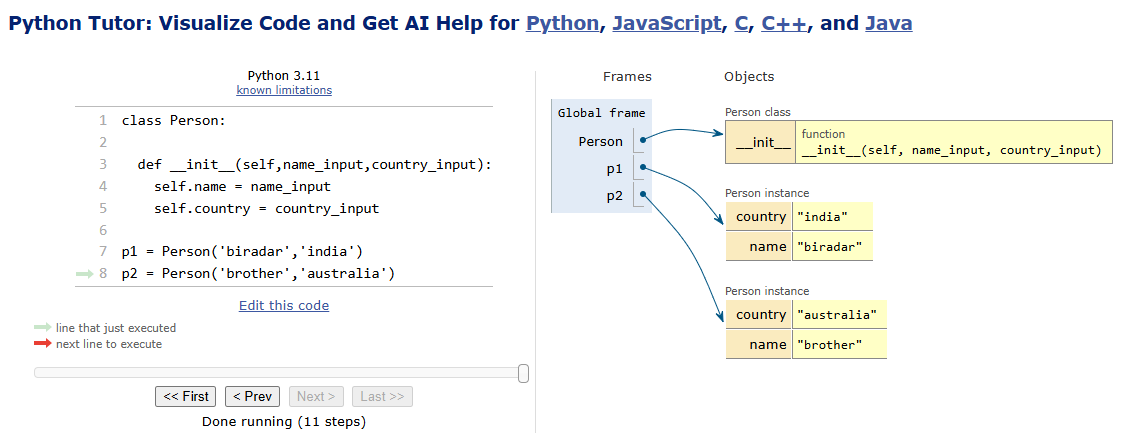</center>

In Object-Oriented Programming (OOP), **instance variables** are variables that are associated with a specific instance (object) of a class. They store data unique to each instance of the class and are typically defined inside the `__init__` method (the constructor).

In this example:
- `self.name_input` and `self.country_input` are **instance variables** because they store data that is specific to each object (`p1` and `p2`).
- They are accessed using `self`, which refers to the current instance of the class.

### Private Variables

#### Concept of Private Variables in OOP in Python

In **Object-Oriented Programming (OOP)**, **private variables** (or attributes) are used to restrict direct access to an object's internal state from outside the class. This helps to implement **encapsulation**, which is one of the core principles of OOP. 

In Python, **private variables** are not strictly enforced by the language but are instead **name-mangled** to prevent accidental access.

#### How to Define Private Variables

In Python, a variable can be considered "private" by convention by prefixing the variable name with two underscores (`__`). This triggers **name mangling**, which changes the name of the variable internally so it’s harder (but not impossible) to access from outside the class.

#### Syntax for Private Variables:

```python
class MyClass:
    def __init__(self, value):
        self.__private_variable = value  # private variable
```

Here, `__private_variable` is a private variable. Python changes its name to `_MyClass__private_variable` internally to prevent direct access from outside the class.

#### Example with Private Variables:

```python
class Person:
    def __init__(self, name, age):
        self.__name = name  # private variable
        self.__age = age    # private variable

    def display_info(self):
        print(f"Name: {self.__name}, Age: {self.__age}")

# Creating an object of the Person class
person = Person("Alice", 30)

# Accessing private variables directly will result in an error
# print(person.__name)  # This will raise an AttributeError

# Using the public method to access private variables
person.display_info()  # Output: Name: Alice, Age: 30
```

In the above example, `__name` and `__age` are private attributes of the `Person` class. The method `display_info()` is used to access and display them, maintaining encapsulation.

#### **"Nothing is Private in Python"**

The phrase "nothing is private in Python" means that **name mangling** (which is the process of changing the name of the variable to include the class name) is not a true enforcement of privacy. A private attribute is just more difficult to access by accident, but it is still accessible if you know how to refer to it.

You can access a private variable like this:

```python
print(person._Person__name)  # Accessing the private variable through name mangling
```

This works because Python internally renames `__name` to `_Person__name`, and knowing this name allows you to bypass the "privacy" and access the variable directly. This shows that Python's approach to privacy is more about **convention** than strict enforcement.

#### Need for Private Variables

Private variables are useful for:

1. **Encapsulation**: They help control access to sensitive data, ensuring that attributes are not modified directly by outside code. This allows you to maintain better control over the internal state of an object.
   
2. **Data Integrity**: By restricting access to internal attributes, you can prevent them from being changed in unexpected ways, ensuring the integrity of the object’s state.

3. **Abstraction**: Private variables hide the internal workings of a class from the outside world. Users of the class do not need to know the internal details, just the public methods that interact with the data.

#### Flaws of Private Variables

1. **Not Truly Private**: As mentioned, Python does not enforce strict privacy. Anyone who understands name mangling can still access private variables.

2. **Increased Complexity**: Sometimes, using private variables can make the code more difficult to understand, especially when you need to access them through getter and setter methods instead of direct access.

3. **Lack of Enforcement**: Since it is not truly private, using private variables in Python may lead to accidental misuse or "bypassing" the private restriction, defeating the purpose of encapsulation.

#### The Need for Private Variables

Despite these flaws, private variables still serve an important purpose in Python:
- They allow you to define internal logic and attributes that should not be directly accessed or modified by external code, helping to protect the integrity of an object's state.
- They give you the flexibility to modify the internal implementation of a class without affecting code that relies on its public interface.

#### Example with Setter and Getter Methods:

To control access to private variables, you can define **getter** and **setter** methods. These methods allow you to get or set private attributes in a controlled manner.

```python
class Person:
    def __init__(self, name, age):
        self.__name = name  # private variable
        self.__age = age    # private variable

    def get_name(self):
        return self.__name

    def set_name(self, name):
        if name.isalpha():
            self.__name = name
        else:
            print("Invalid name!")

    def display_info(self):
        print(f"Name: {self.__name}, Age: {self.__age}")

# Creating an object of the Person class
person = Person("Alice", 30)

# Using getter and setter
print(person.get_name())  # Output: Alice
person.set_name("Bob")    # Sets the name to Bob
person.display_info()      # Output: Name: Bob, Age: 30

# Trying to set an invalid name
person.set_name("Alice123")  # Output: Invalid name!
```

In this case, we have getter (`get_name()`) and setter (`set_name()`) methods that control how the private attribute `__name` is accessed and modified.

Note that the **getter** and **setter** method are able to access and work with the attributes of the object because the getter and setter are themselves defined within the class, and, the private attributes can be **accessed*** from the inside, and not from the outside.

#### Conclusion

- **Private variables** in Python are defined using a double underscore (`__`), which triggers name mangling to make the variable harder to access from outside the class.
- **Encapsulation** and **data integrity** are key reasons for using private variables, but Python’s approach is based on convention rather than strict enforcement, meaning that private variables can still be accessed with knowledge of their mangled names.
- **Flaws** include that privacy isn't truly enforced and can lead to unintended access.
- For better control over private attributes, **getter** and **setter** methods can be used to regulate access to private variables.

### Encapsulation in OOP (Object-Oriented Programming)

**Encapsulation** is one of the four fundamental principles of Object-Oriented Programming (OOP), and it refers to the concept of **bundling** the data (attributes) and the methods (functions) that operate on that data into a single unit called a **class**. Encapsulation also involves **restricting access to certain internal details** of the object to protect its integrity and ensure that it is used properly.

#### Key Points:
- **Hiding Internal Details**: Encapsulation allows you to hide the internal state and implementation details of an object from the outside world. This helps to prevent accidental modification of an object’s state, ensuring that it can only be changed in controlled ways.
- **Public Interface**: The class provides a **public interface** (usually through **methods**) that can be used by external code, but the internal state (variables) is kept private or protected.
- **Data Protection**: By restricting direct access to an object's internal data (through private variables), you ensure that the object’s data is only modified in the intended manner.

#### How Does Encapsulation Work?

1. **Private Variables**: In Python, private variables (attributes) are defined using a double underscore (`__`) prefix. This triggers **name mangling**, making it harder to access them directly from outside the class. The variables are intended to be accessed only through methods.
   
2. **Getter and Setter Methods**: These are public methods that allow controlled access to the private variables. A getter retrieves the value of the private attribute, and a setter modifies the attribute with validation or specific rules.

#### Example of Encapsulation:

```python
class BankAccount:
    def __init__(self, balance):
        self.__balance = balance  # private variable to store balance
    
    # Getter method to retrieve balance
    def get_balance(self):
        return self.__balance
    
    # Setter method to deposit money with validation
    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
        else:
            print("Deposit amount must be positive!")
    
    # Method to withdraw money
    def withdraw(self, amount):
        if 0 < amount <= self.__balance:
            self.__balance -= amount
        else:
            print("Invalid withdrawal amount!")
    
# Creating a BankAccount object
account = BankAccount(1000)

# Accessing the private variable through the getter method
print(account.get_balance())  # Output: 1000

# Using setter to deposit money
account.deposit(500)
print(account.get_balance())  # Output: 1500

# Trying to withdraw more than available balance
account.withdraw(2000)  # Output: Invalid withdrawal amount!
```

#### Explanation:
- **Private Variable**: The `__balance` attribute is private, meaning it can't be accessed directly from outside the class.
- **Encapsulation via Methods**: The `deposit()` and `withdraw()` methods allow external code to modify the `__balance` attribute in a controlled manner. They include checks to ensure valid operations.
- **Public Interface**: The `get_balance()` method serves as the public interface to access the balance, ensuring external code only interacts with the class through defined methods, not directly accessing the internal state.

#### Why is Encapsulation Important?
1. **Data Protection**: By keeping the internal state of an object hidden and only providing controlled access, you protect the data from being modified in unintended ways.
2. **Flexibility and Maintenance**: You can change the internal implementation of a class without affecting code that uses it. For example, you could modify how the balance is stored or calculated without changing the methods that deposit or withdraw money.
3. **Code Organization**: Encapsulation helps in organizing the code by bundling related data and methods together, making it more modular and easier to maintain.

#### Conclusion:
Encapsulation is about **hiding the internal details** of an object and exposing only what is necessary to the outside world, typically through getter and setter methods. This helps maintain control over the data and ensures that it is used correctly, improving both **security** and **maintainability** in object-oriented designs.

## Collection of Objects
This is s simple concept implying that objects can be stored in structures such as lists, tuples, sets, and dictionaries. *for example, consider the below code*
```python
# list of objects
class Person:

  def __init__(self,name,gender):
    self.name = name
    self.gender = gender

p1 = Person('nitish','male')
p2 = Person('ankit','male')
p3 = Person('ankita','female')

L = [p1,p2,p3]
t = (p1, p2, p3)
s = set({p1, p2, p3})

for i in L:
  print(i.name,i.gender)
```

In [61]:
# list of objects
class Person:

  def __init__(self,name,gender):
    self.name = name
    self.gender = gender

p1 = Person('nitish','male')
p2 = Person('ankit','male')
p3 = Person('ankita','female')

L = [p1,p2,p3]
t = (p1, p2, p3)
s = set({p1, p2, p3})

for i in L:
  print(i.name,i.gender)
print(s)

nitish male
ankit male
ankita female
{<__main__.Person object at 0x00000298E40AD010>, <__main__.Person object at 0x00000298E41647D0>, <__main__.Person object at 0x00000298E4164690>}


## Static Variable

In Python, **static variables** (often called **class variables**) are variables that are shared among all instances of a class. Unlike **instance variables**, which are specific to each instance, static variables are common to all instances of the class. They are defined at the **class level** rather than the **instance level**, meaning they are not tied to a specific object.

### Key Characteristics of Static Variables:
- **Shared Across Instances**: All instances of a class share the same static variable.
- **Defined in the Class**: They are usually defined within the class, outside of any instance methods.
- **Accessed via Class or Instance**: Static variables can be accessed using both the class name and the instance name.

### Syntax for Static Variables:

```python
class MyClass:
    static_variable = 0  # Static variable

    def __init__(self):
        pass
```

### Example of Static Variables:

```python
class Counter:
    count = 0  # Static variable shared by all instances

    def __init__(self):
        Counter.count += 1  # Increment the static variable for every instance

    def display_count(self):
        print(f"Current count: {Counter.count}")

# Creating multiple instances of the Counter class
counter1 = Counter()
counter2 = Counter()
counter3 = Counter()

# Displaying the count using an instance method
counter1.display_count()  # Output: Current count: 1
counter2.display_count()  # Output: Current count: 2
counter3.display_count()  # Output: Current count: 3

# Accessing the static variable directly through the class
print(Counter.count)  # Output: 3
```

### Explanation:

1. **Static Variable `count`**:
   - The `count` variable is defined as a **static variable** at the class level, meaning it is shared by all instances of the `Counter` class.
   - Every time a new instance of the `Counter` class is created, the `__init__` method increments the `count` variable by 1.
   
2. **Shared Across Instances**:
   - Regardless of how many instances (`counter1`, `counter2`, `counter3`) are created, the `count` variable remains the same across all instances.
   - Therefore, when `display_count()` is called on any instance, it shows the same value because `count` is shared.

3. **Accessing via Class or Instance**:
   - You can access a static variable using either the **class name** (`Counter.count`) or through an **instance** (`counter1.count`).
   
### Why Use Static Variables?

1. **Shared Data**: Static variables are useful when you want all instances of a class to share common data, like a counter, configuration, or default settings.
2. **Efficiency**: You can avoid duplicating data for every instance. Instead, it’s stored once at the class level.
3. **State Tracking**: Static variables can be used to track some global state for the class, like counting how many objects have been created, as shown in the example.

### Conclusion:
- Static variables are **shared across all instances** of a class and are stored at the **class level**.
- They are useful for tracking common data across all objects of the class or for maintaining global state.


Another example using the Atm class that we made earlier.

In [ ]:
class Atm:

  # declaring a private static variable counter
  __counter = 1

  # constructor(special function)->superpower ->
  def __init__(self):
    print(id(self))
    self.pin = ''
    self.__balance = 0
    self.cid = Atm.__counter
    Atm.__counter = Atm.__counter + 1 # counter being incremented for all the instances
    #self.menu()

  # utility functions
  @staticmethod
  def get_counter(): # removing the self parameter because there is no use to point at the corresponding object, but the reference to the class itself is being made
    return Atm.__counter


  def get_balance(self):
    return self.__balance

  def set_balance(self,new_value):
    if type(new_value) == int:
      self.__balance = new_value
    else:
      print('beta bahot maarenge')

  def __menu(self):
    user_input = input("""
    Hi how can I help you?
    1. Press 1 to create pin
    2. Press 2 to change pin
    3. Press 3 to check balance
    4. Press 4 to withdraw
    5. Anything else to exit
    """)

    if user_input == '1':
      self.create_pin()
    elif user_input == '2':
      self.change_pin()
    elif user_input == '3':
      self.check_balance()
    elif user_input == '4':
      self.withdraw()
    else:
      exit()

  def create_pin(self):
    user_pin = input('enter your pin')
    self.pin = user_pin

    user_balance = int(input('enter balance'))
    self.__balance = user_balance

    print('pin created successfully')

  def change_pin(self):
    old_pin = input('enter old pin')

    if old_pin == self.pin:
      # let him change the pin
      new_pin = input('enter new pin')
      self.pin = new_pin
      print('pin change successful')
    else:
      print('nai karne de sakta re baba')

  def check_balance(self):
    user_pin = input('enter your pin')
    if user_pin == self.pin:
      print('your balance is ',self.__balance)
    else:
      print('chal nikal yahan se')

  def withdraw(self):
    user_pin = input('enter the pin')
    if user_pin == self.pin:
      # allow to withdraw
      amount = int(input('enter the amount'))
      if amount <= self.__balance:
        self.__balance = self.__balance - amount
        print('withdrawl successful.balance is',self.__balance)
      else:
        print('abe garib')
    else:
      print('sale chor')